In [22]:
import os
import sys
import csv
import logging
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
import seaborn as sns

repo_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..',))
sys.path.append(repo_root)

from src import *

In [23]:
process_directory(os.getcwd(), 'ex02.1')
process_directory(os.getcwd(), 'ex02.2')
process_directory(os.getcwd(), 'ex02.3')

In [29]:
def group_results_df(averages_df, compared_col, title, binary=False):
    means = calculate_column_means_against_base(averages_df, compared_col)
    if title == 'RMS':
        prop = calculate_percentages_against_base(averages_df, compared_col, flipped=True)
    else:
        prop = calculate_percentages_against_base(averages_df, compared_col)

    means.update({'title': title, 'metric': 'mean'})
    prop.update({'title': title, 'metric': 'proportion'})
    
    return means, prop

    
def plot_distributions(ax, df, title, compared_col):

    for column in df.columns:
        if 'Unnamed' not in column and column != 'rep' and column != 'Game' and column != compared_col:
            sns.kdeplot((df[column]-df[compared_col]), ax=ax, label=column)
    
    ax.set_title(f'{title} Distributions')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.legend()

def visualize_results(base_path, compared_col, binary=False):
    # Read the summary CSV files
    log_likelihood_df = pd.read_csv(os.path.join(base_path, 'log_likelihood_summary.csv'))
    leadership_log_likelihood_df = pd.read_csv(os.path.join(base_path, 'leadership_log_likelihood_summary.csv'))
    rms_df = pd.read_csv(os.path.join(base_path, 'rms_summary.csv'))
    rho_df = pd.read_csv(os.path.join(base_path, 'rho_summary.csv'))
    tau_df = pd.read_csv(os.path.join(base_path, 'tau_summary.csv'))

    # List of dataframes and their titles
    dataframes = [
        (log_likelihood_df, 'Log Likelihood'),
        (leadership_log_likelihood_df, 'Leadership Log Likelihood'),
        (rms_df, 'RMS'),
        (rho_df, 'Rho'),
        (tau_df, 'Tau')
    ]

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    plt.rc('text', usetex=False)
    plt.rc('font', size=20, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})
    plt.rcParams['xtick.major.pad'] = 8
    plt.rcParams['ytick.major.pad'] = 8

    results = []
    for i, (df, title) in enumerate(dataframes):
        if binary:
            df = df[['Spring_Rank', 'Page_Rank', 'Point_Wise', 'BT']]
        means, prop = group_results_df(df, compared_col, title, binary)
        plot_distributions(axes[i], df, title, compared_col)
        results.extend([means, prop])

    # Convert results to a DataFrame for better visualization
    results_df = pd.DataFrame(results).T
 
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    pd.set_option('display.max_colwidth', None)
    print(results_df)
        

    plt.tight_layout()
    plt.show()


# Standard 

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

                          0               1                          2  \
Spring_Rank       -0.105495             0.0                  -0.105495   
Page_Rank         -0.632436             0.0                  -0.632436   
Point_Wise        -0.159969             0.0                  -0.159969   
title        Log Likelihood  Log Likelihood  Leadership Log Likelihood   
metric                 mean      proportion                       mean   

                                     3         4           5         6  \
Spring_Rank                        0.0  0.754139         0.0 -0.025483   
Page_Rank                          0.0   1.65798         0.0 -1.725653   
Point_Wise                         0.0  0.897382         0.0 -0.025283   
title        Leadership Log Likelihood       RMS         RMS       Rho   
metric                      proportion      mean  proportion      mean   

                      7         8           9  
Spring_Rank         0.0 -0.025483         0.0  
Page_Rank     

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

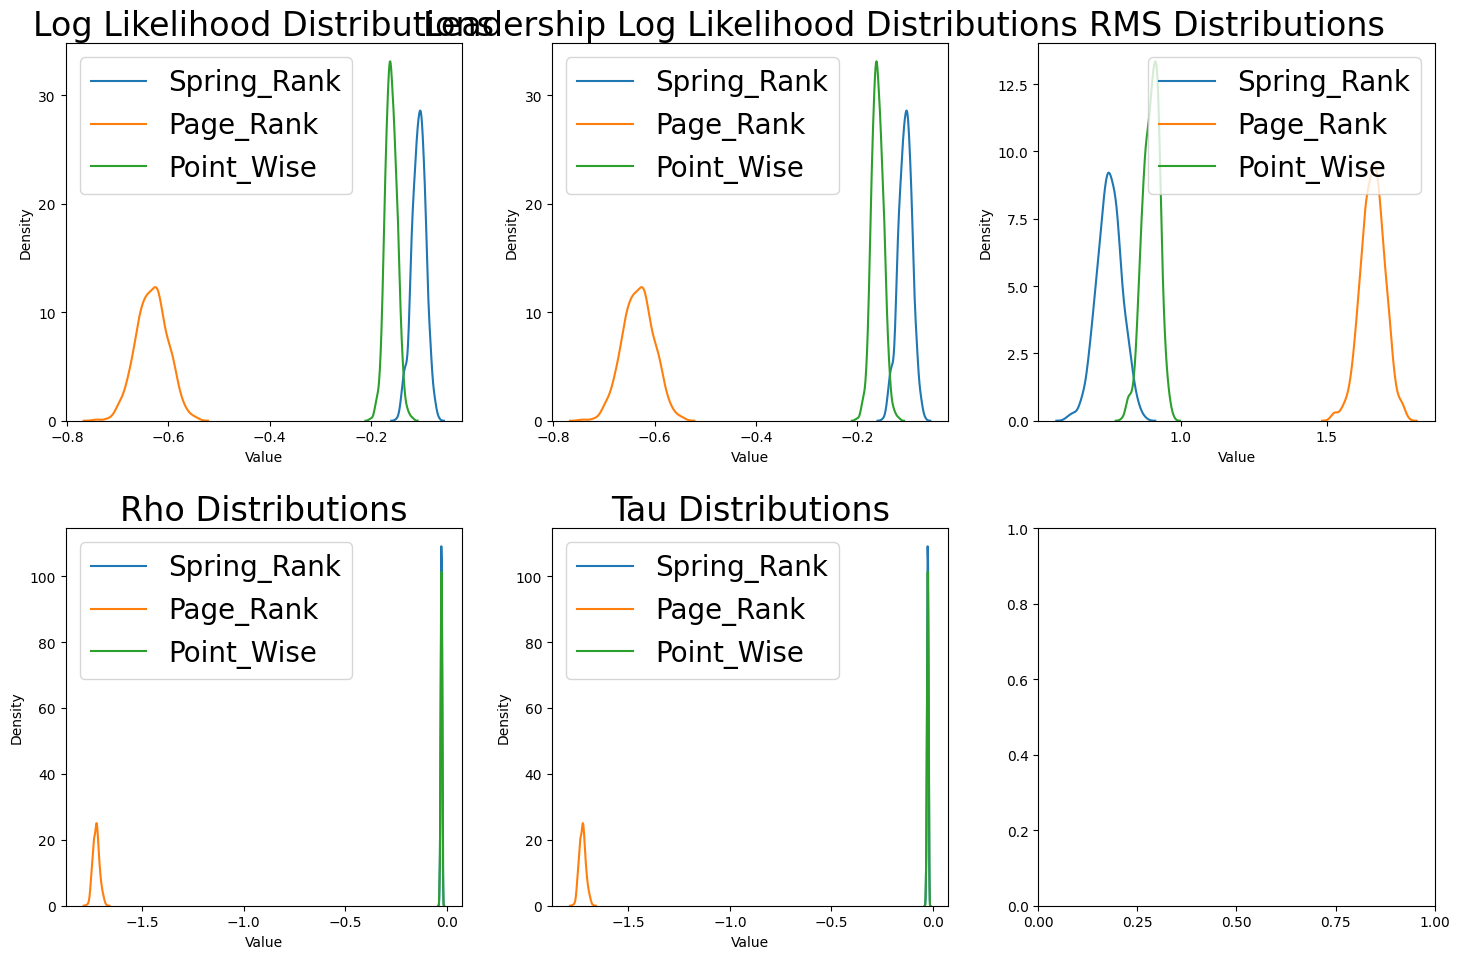

In [30]:
path = os.path.join(os.getcwd(), 'results', 'ex02.1')
visualize_results(path, compared_col='BT', binary=True)

# Higher Order 

                                     0               1  \
BT                           -0.011602           0.006   
BT_leadership                -1.380598             0.0   
HOL_BT                       -0.888154             0.0   
Spring_Rank                  -0.161829             0.0   
Spring_Rank_Leadership       -0.230788             0.0   
Page_Rank                    -0.609573             0.0   
Page_Rank_Leadership         -0.643267             0.0   
Point_Wise                   -0.076424             0.0   
title                   Log Likelihood  Log Likelihood   
metric                            mean      proportion   

                                                2                          3  \
BT                                       0.046174                        1.0   
BT_leadership                            0.192174                        1.0   
HOL_BT                                   0.201121                        1.0   
Spring_Rank                             -

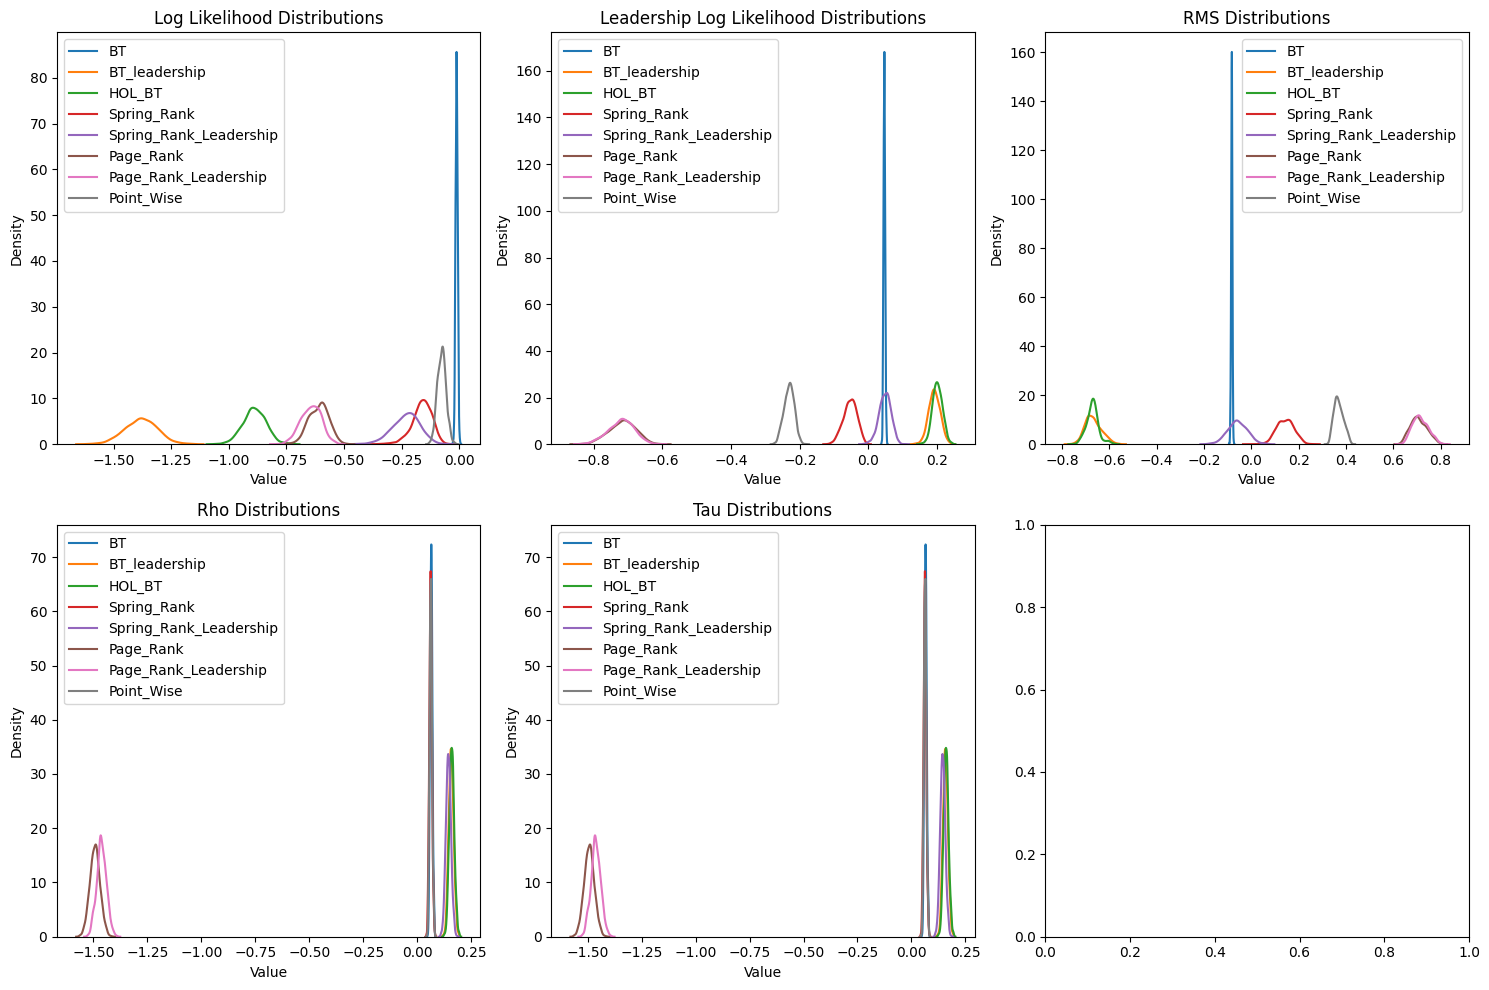

In [27]:
path = os.path.join(os.getcwd(), 'results', 'ex02.2')
visualize_results(path, compared_col='HO_BT')

# Higher Order Leadership

                                     0               1  \
BT                            0.880303             1.0   
BT_leadership                -0.494481             0.0   
HO_BT                         0.892138             1.0   
Spring_Rank                    0.73277             1.0   
Spring_Rank_Leadership        0.661855             1.0   
Page_Rank                     0.283001             1.0   
Page_Rank_Leadership          0.249764           0.999   
Point_Wise                     0.81622             1.0   
title                   Log Likelihood  Log Likelihood   
metric                            mean      proportion   

                                                2                          3  \
BT                                       -0.15456                        0.0   
BT_leadership                           -0.008926                      0.004   
HO_BT                                   -0.200693                        0.0   
Spring_Rank                             -

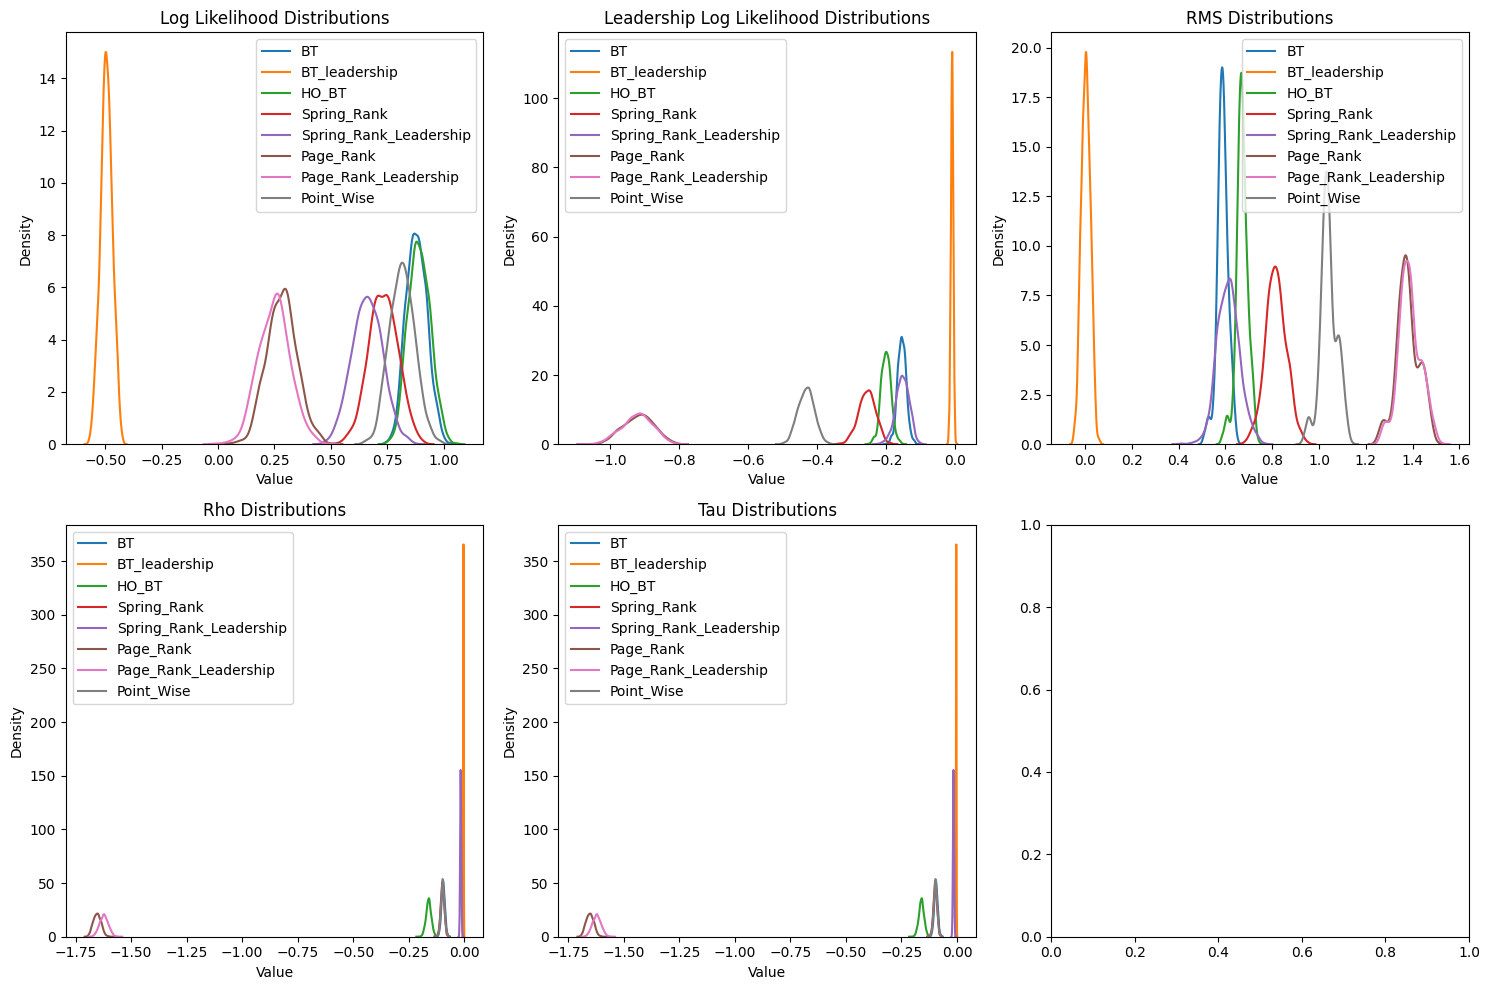

In [28]:
path = os.path.join(os.getcwd(), 'results', 'ex02.3')
visualize_results(path, compared_col='HOL_BT')